# Environment
Currently local to Andromeda

# Generating waveforms

In [1]:
import numpy as np
import lalsimulation
import lal
import matplotlib.pyplot as plt
import imageio

In [2]:
# Define binary parameters
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0e6*lal.PC_SI
inclination = 0.
spin1_z = 0.5
spin2_z =  0.5
deltaT = 1./8192.

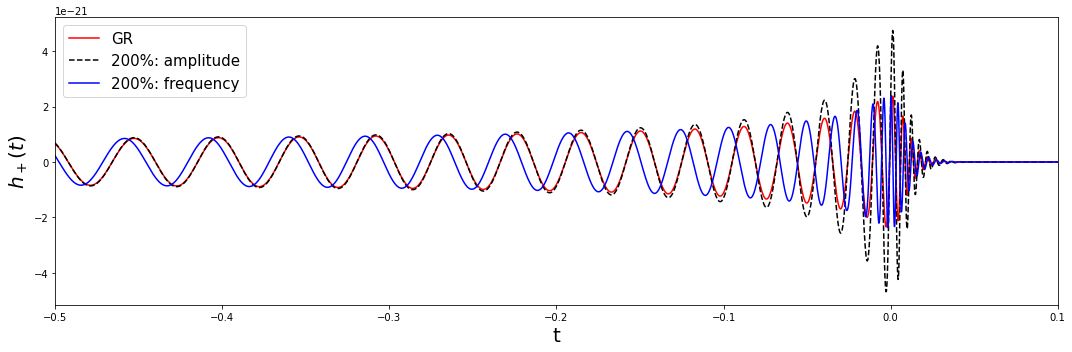

In [3]:
%matplotlib inline

plt.figure(figsize=(15,5))

paramdict = lal.CreateDict()

######## GR ###########
lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 0.0)
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 0.0)

# Generate the waveform
hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h1 = hp1.data.data - 1j*hc1.data.data
time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

idx_max, = np.where(abs(h1) == max(abs(h1)))
time_array1 = time_array1 - time_array1[idx_max]

######## dnra=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 1.0)

# Generate the waveform
hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h2 = hp2.data.data - 1j*hc2.data.data
time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

idx_max, = np.where(abs(h2) == max(abs(h2)))
time_array2 = time_array2 - time_array2[idx_max]

######## dnromega=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 1.0)

# Generate the waveform
hp3, hc3 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h3 = hp3.data.data - 1j*hc3.data.data
time_array3 = np.arange(0,len(h3)*deltaT,deltaT)

idx_max, = np.where(abs(h3) == max(abs(h3)))
time_array3 = time_array3 - time_array3[idx_max]

# plotting
plt.plot(time_array1, hp1.data.data, color='r', label="GR")
plt.plot(time_array2, hp2.data.data, color='k', ls='dashed', label="200%: amplitude")
plt.plot(time_array3, hp3.data.data, color='b', label="200%: frequency")
plt.xlabel('t', fontsize=20)
plt.ylabel('$h_+(t)$', fontsize=20)
plt.xlim([-0.5,0.1])

plt.legend(loc="best", fontsize=15)

plt.tight_layout()
plt.show()

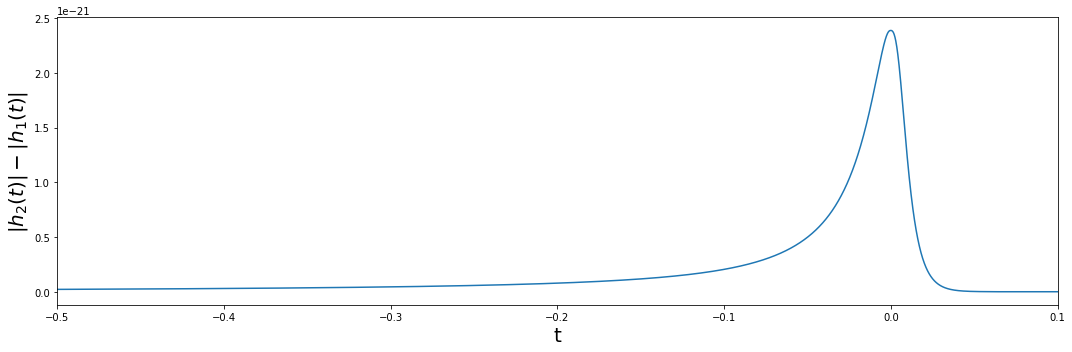

In [4]:
plt.figure(figsize=(15,5))
plt.plot(time_array1, abs(h2)-abs(h1))
plt.xlim([-0.5,0.1])
plt.xlabel('t', fontsize=20)
plt.ylabel('$|h_2(t)| - |h_1(t)|$', fontsize=20)

plt.tight_layout()
plt.show()

In [5]:
import imageio

# Define binary parameters
phi_c = 0.
f_start22 = 20. #Frequency of the 22 mode at which the signal starts
distance = 500.0e6*lal.PC_SI
inclination = 0.
deltaT = 1./4096.

i = 0

for M in np.linspace(80., 200., 5):
  for q in np.linspace(0.1, 1., 5):
    for (spin1_z, spin2_z) in zip(np.linspace(-1, 1, 5), np.linspace(-1, 1, 5)):
      for (dnra, dnromega) in zip(np.linspace(0., 1, 5), np.linspace(0., 1, 5)):
            
            #print(M, q, spin1_z, spin2_z, dnra, dnromega, i)
                 
            m1 = q*M/(1. + q)
            m2 = M/(1. + q)                            

            ######## GR ###########
            paramdict = lal.CreateDict()

            lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 0.0)
            lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 0.0)

            # Generate the waveform
            hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1*lal.MSUN_SI, m2*lal.MSUN_SI,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                                phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
            h1 = hp1.data.data - 1j*hc1.data.data
            time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

            idx_max, = np.where(abs(h1) == max(abs(h1)))
            time_array1 = time_array1 - time_array1[idx_max]                                  

            ######## NonGR###########
            paramdict = lal.CreateDict()

            #add a deviation nra=1.0
            lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, dnra)
            lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, dnromega)

            # Generate the waveform
            hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1*lal.MSUN_SI, m2*lal.MSUN_SI,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM_PA)
            h2 = hp2.data.data - 1j*hc2.data.data
            time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

            idx_max, = np.where(abs(h2) == max(abs(h2)))
            time_array2 = time_array2 - time_array2[idx_max]


            # plotting
            plt.plot(time_array1, hp1.data.data, color='#6d6875', lw=3, label="GR")
            plt.plot(time_array2, hp2.data.data, color='#ffb4a2', lw=2, label="non-GR")
            plt.xlabel('t', fontsize=20)
            plt.ylabel('$h_+(t)$', fontsize=20)
            plt.xlim([-0.1,0.05])
            plt.ylim([-5e-21,5e-21])
            plt.title(f"$M={M:.1f},q={q:.2f},\chi_1={spin1_z:.2f},\chi_2={spin2_z:.2f},\ndnra={dnra:.2f}, dnromega={dnromega:.2f}$")
            
            plt.savefig(f"./gifplots/fig_{i}.png")
            plt.clf()
            
            i += 1
            
with imageio.get_writer('./gifplots/waveform_mass_spin_dev.gif', mode='I') as writer:
    for filename in [f"./gifplots/fig_{n}.png" for n in range(i)]:
        image = imageio.imread(filename)
        writer.append_data(image)             

<Figure size 432x288 with 0 Axes>

## GW200129 REAL EVENT

In [2]:
post_loc = "./GW200129_real_event_tgr.dat"

data = np.genfromtxt(post_loc, names=True, dtype=None)

m1, m2, a1z, a2z, distance, phi_c, dnra, dnromega = data["m1"], data["m2"], data["a1z"], data["a2z"],\
                                                data["dist"], data["phase"],\
                                                data["dnra"], data["dnromega"]

In [3]:
f_start22 = 20. #Frequency of the 22 mode at which the signal starts
deltaT = 1./4096.

######## GR ###########
paramdict = lal.CreateDict()

lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 0.0)
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 0.0)

m1_inj, m2_inj, a1z_inj, a2z_inj, distance_inj, phi_c_inj = 51.639, 20.746, 0, 0, 682.041, 4.2169999615

# Generate the waveform
hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1_inj*lal.MSUN_SI, m2_inj*lal.MSUN_SI,  0., 0., \
                                                      a1z_inj, 0., 0., a2z_inj, distance_inj*1e6*lal.PC_SI, 0., \
                                                      phi_c_inj, 0., 0., 0., deltaT, f_start22, f_start22, \
                                                      paramdict, lalsimulation.SEOBNRv4HM)

h1 = hp1.data.data - 1j*hc1.data.data
time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

idx_max, = np.where(abs(h1) == max(abs(h1)))
time_array1 = time_array1 - time_array1[idx_max] 

i = 0

for idx in range(len(data)):                                 

            ######## NonGR###########
    
            paramdict = lal.CreateDict()

            lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, dnra[idx])
            lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, dnromega[idx])

            hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1[idx]*lal.MSUN_SI, m2[idx]*lal.MSUN_SI,  
                                                      0., 0., a1z[idx], 0., 0., a2z[idx], 
                                                      distance[idx]*1e6*lal.PC_SI, 0., 
                                                      phi_c[idx], 0., 0., 0., deltaT, f_start22, f_start22, 
                                                      paramdict, lalsimulation.SEOBNRv4HM)
            h2 = hp2.data.data - 1j*hc2.data.data
            
            time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

            idx_max, = np.where(abs(h2) == max(abs(h2)))
            time_array2 = time_array2 - time_array2[idx_max]
            
            plt.plot(time_array1, hp1.data.data, color='#6d6875', lw=3, label="GR")
            plt.plot(time_array2, hp2.data.data, color='#ffb4a2', lw=2, label="non-GR")
            plt.xlabel('t', fontsize=20)
            plt.ylabel('$h_+(t)$', fontsize=20)
            plt.xlim([-0.1,0.05])
            plt.ylim([-5e-21,5e-21])
            #plt.title(f"$M={M:.1f},q={q:.2f},\chi_1={spin1_z:.2f},\chi_2={spin2_z:.2f},\ndnra={dnra:.2f}, dnromega={dnromega:.2f}$")
            
            plt.savefig(f"./GW200129m_gifplots/fig_{i}.png")
            plt.clf()
            
            i += 1
            
with imageio.get_writer('./GW200129m_gifplots/waveform_mass_spin_dev.gif', mode='I') as writer:
    for filename in [f"./GW200129m_gifplots/fig_{n}.png" for n in range(i)]:
        image = imageio.imread(filename)
        writer.append_data(image)       

<Figure size 432x288 with 0 Axes>

# Time of attachment

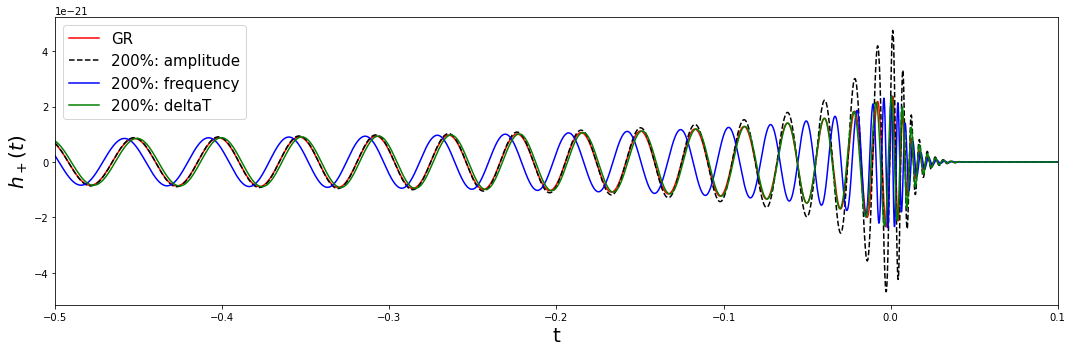

In [4]:
%matplotlib inline

plt.figure(figsize=(15,5))

paramdict = lal.CreateDict()

######## GR ###########
lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 0.0)
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 0.0)
lalsimulation.SimInspiralWaveformParamsInsertDNRDeltaT(paramdict, 0.0)

# Generate the waveform
hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h1 = hp1.data.data - 1j*hc1.data.data
time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

idx_max, = np.where(abs(h1) == max(abs(h1)))
time_array1 = time_array1 - time_array1[idx_max]

######## dnra=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 1.0)

# Generate the waveform
hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h2 = hp2.data.data - 1j*hc2.data.data
time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

idx_max, = np.where(abs(h2) == max(abs(h2)))
time_array2 = time_array2 - time_array2[idx_max]

######## dnromega=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 1.0)

# Generate the waveform
hp3, hc3 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h3 = hp3.data.data - 1j*hc3.data.data
time_array3 = np.arange(0,len(h3)*deltaT,deltaT)

idx_max, = np.where(abs(h3) == max(abs(h3)))
time_array3 = time_array3 - time_array3[idx_max]

######## dnrDeltaT=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNRDeltaT(paramdict, 1.0)

# Generate the waveform
hp4, hc4 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h4 = hp4.data.data - 1j*hc4.data.data
time_array4 = np.arange(0,len(h4)*deltaT,deltaT)

idx_max, = np.where(abs(h4) == max(abs(h4)))
time_array4 = time_array4 - time_array4[idx_max]


# plotting
plt.plot(time_array1, hp1.data.data, color='r', label="GR")
plt.plot(time_array2, hp2.data.data, color='k', ls='dashed', label="200%: amplitude")
plt.plot(time_array3, hp3.data.data, color='b', label="200%: frequency")
plt.plot(time_array4, hp4.data.data, color='g', label="200%: deltaT")
plt.xlabel('t', fontsize=20)
plt.ylabel('$h_+(t)$', fontsize=20)
plt.xlim([-0.5,0.1])

plt.legend(loc="best", fontsize=15)

plt.tight_layout()
plt.show()

In [25]:
import imageio

# Define binary parameters
phi_c = 0.
f_start22 = 40. #Frequency of the 22 mode at which the signal starts
distance = 500.0e6*lal.PC_SI
inclination = 0.
deltaT = 1./8192.

i = 0

for M in [100]:#np.linspace(80., 200., 5):
  for q in [1]:#np.linspace(0.1, 1., 5):
    for (spin1_z, spin2_z) in zip([0], [0]):#zip(np.linspace(-1, 1, 5), np.linspace(-1, 1, 5)):
      for dnrDeltaT in np.linspace(-1., 1., 100):
            
            #print(M, q, spin1_z, spin2_z, dnra, dnromega, i)
                 
            m1 = q*M/(1. + q)
            m2 = M/(1. + q)                            

            ######## GR ###########
            paramdict = lal.CreateDict()

            # Generate the waveform
            hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1*lal.MSUN_SI, m2*lal.MSUN_SI,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                                phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
            h1 = hp1.data.data - 1j*hc1.data.data
            time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

            #idx_max, = np.where(abs(h1) == max(abs(h1)))
            #time_array1 = time_array1 - time_array1[idx_max]                                  

            ######## NonGR###########
            paramdict = lal.CreateDict()

            #add a deviation nra=1.0
            lalsimulation.SimInspiralWaveformParamsInsertDNRDeltaT(paramdict, dnrDeltaT)

            # Generate the waveform
            hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1*lal.MSUN_SI, m2*lal.MSUN_SI,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM_PA)
            h2 = hp2.data.data - 1j*hc2.data.data
            time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

            #idx_max, = np.where(abs(h2) == max(abs(h2)))
            #time_array2 = time_array2 - time_array2[idx_max]


            # plotting
            plt.figure(figsize=(15,5))
            plt.plot(time_array1, hp1.data.data, color='#6d6875', lw=3, label="GR")
            plt.plot(time_array2, hp2.data.data, color='#ffb4a2', lw=2, label="non-GR")
            plt.xlabel('t', fontsize=20)
            plt.ylabel('$h_+(t)$', fontsize=20)
            plt.xlim([0.02,0.07])
            plt.ylim([-5e-21,5e-21])
            plt.title(f"$M={M:.1f},q={q:.2f},\chi_1={spin1_z:.2f},\chi_2={spin2_z:.2f},\ndnrDeltaT={dnrDeltaT:.2f}$")
            
            plt.savefig(f"./dnrDeltaT/fig_{i}.png")
            #plt.clf()
            plt.close()
            
            i += 1
            
with imageio.get_writer('./dnrDeltaT/waveform_mass_spin_dev_merger_closeup_8192.gif', mode='I') as writer:
    for filename in [f"./dnrDeltaT/fig_{n}.png" for n in range(i)]:
        image = imageio.imread(filename)
        writer.append_data(image)             

(-5e-21, 5e-21)

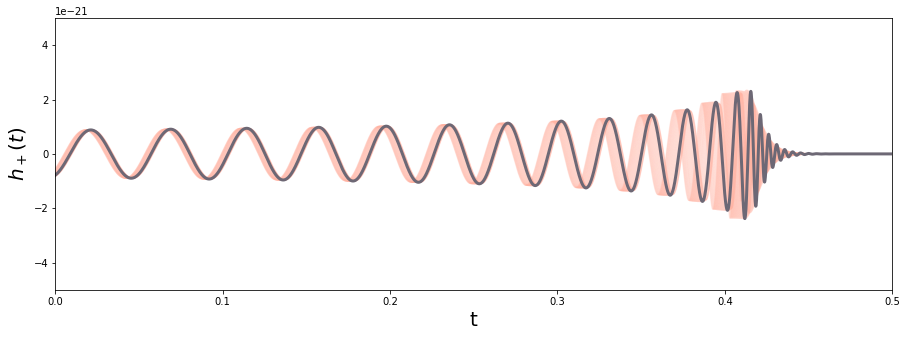

In [3]:
import imageio

# Define binary parameters
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 20. #Frequency of the 22 mode at which the signal starts
distance = 500.0e6*lal.PC_SI
inclination = 0.
spin1_z = 0.5
spin2_z =  0.5
deltaT = 1./8192.                                                          


plt.figure(figsize=(15,5))


for dnrDeltaT in np.linspace(-1., 2., 100):                                                           

            ######## NonGR###########
            paramdict = lal.CreateDict()

            #add a deviation nra=1.0
            lalsimulation.SimInspiralWaveformParamsInsertDNRDeltaT(paramdict, dnrDeltaT)

            # Generate the waveform
            hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM_PA)
            h2 = hp2.data.data - 1j*hc2.data.data
            time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

            #idx_max, = np.where(abs(h2) == max(abs(h2)))
            #time_array2 = time_array2 - time_array2[idx_max]


            # plotting
            plt.plot(time_array2, hp2.data.data, color='#ffb4a2', lw=1, alpha=0.1)

######## GR ###########
paramdict = lal.CreateDict()

# Generate the waveform
hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h1 = hp1.data.data - 1j*hc1.data.data
time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

#idx_max, = np.where(abs(h1) == max(abs(h1)))
#time_array1 = time_array1 - time_array1[idx_max] 
plt.plot(time_array1, hp1.data.data, color='#6d6875', lw=3, label="GR")

            
plt.xlabel('t', fontsize=20)
plt.ylabel('$h_+(t)$', fontsize=20)
plt.xlim([0.0,0.5])
plt.ylim([-5e-21,5e-21])